In [1]:
# ! pip install pandas numpy matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("BIC data analyst test challenge - contacts_data.csv")
df

id property_hs_analytics_source property_hs_latest_source  \
0      1                      OFFLINE                   OFFLINE   
1      2                      OFFLINE                   OFFLINE   
2      3              EMAIL_MARKETING                   OFFLINE   
3      4                      OFFLINE                   OFFLINE   
4      5                      OFFLINE            DIRECT_TRAFFIC   
..   ...                          ...                       ...   
495  496                      OFFLINE                   OFFLINE   
496  497                      OFFLINE                   OFFLINE   
497  498                      OFFLINE                   OFFLINE   
498  499                      OFFLINE                   OFFLINE   
499  500                      OFFLINE                   OFFLINE   

    property_hs_lead_status property_lifecyclestage property_source  \
0                 Qualified                customer             NaN   
1       Sales Captured Lead             opportunity             NaN   
2                  Customer                customer             NaN   
3                 Retention                customer             NaN   
4                  Customer                customer             NaN   
..                      ...                     ...             ...   
495                Customer                customer             NaN   
496               Qualified                customer             NaN   
497                Customer                customer             NaN   
498               Retention                customer             NaN   
499     Sales Captured Lead                customer             NaN   

     property_total_revenue  \
0                     900.0   
1                       0.0   
2                     300.0   
3                     225.0   
4                     720.0   
..                      ...   
495                  1530.0   
496                  2700.0   
497                  1800.0   
498                   750.0   
499                     0.0   

     property_hs_time_between_contact_creation_and_deal_close  \
0                                         1.684435e+10          
1                                                  NaN          
2                                         3.901640e+10          
3                                         5.711067e+10          
4                                         5.683087e+10          
..                                                 ...          
495                                       4.908381e+10          
496                                       3.869894e+10          
497                                       5.314384e+10          
498                                       4.348913e+10          
499                                       1.443426e+09          

     property_hs_time_to_move_from_lead_to_customer  
0                                      2.138725e+09  
1                                               NaN  
2                                      2.138718e+09  
3                                      2.138711e+09  
4                                      2.138713e+09  
..                                              ...  
495                                    1.120896e+09  
496                                    2.138714e+09  
497                                    1.120900e+09  
498                                    2.138714e+09  
499                                    8.441603e+08  

[500 rows x 9 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   id                                                        500 non-null    int64  
 1   property_hs_analytics_source                              500 non-null    object 
 2   property_hs_latest_source                                 500 non-null    object 
 3   property_hs_lead_status                                   496 non-null    object 
 4   property_lifecyclestage                                   500 non-null    object 
 5   property_source                                           118 non-null    object 
 6   property_total_revenue                                    500 non-null    float64
 7   property_hs_time_between_contact_creation_and_deal_close  471 non-null    float64
 8   property_hs_time_to_m

In [5]:
df.describe()

id  property_total_revenue  \
count  500.000000              500.000000   
mean   250.500000             4573.503810   
std    144.481833            16550.526526   
min      1.000000                0.000000   
25%    125.750000              450.000000   
50%    250.500000             1080.000000   
75%    375.250000             3000.000000   
max    500.000000           262380.000000   

       property_hs_time_between_contact_creation_and_deal_close  \
count                                       4.710000e+02          
mean                                        2.675788e+10          
std                                         1.705878e+10          
min                                         3.300000e+01          
25%                                         1.306573e+10          
50%                                         2.477552e+10          
75%                                         4.057383e+10          
max                                         6.533759e+10          

       property_hs_time_to_move_from_lead_to_customer  
count                                    4.560000e+02  
mean                                     2.123421e+09  
std                                      1.789731e+09  
min                                      3.115480e+05  
25%                                      2.138713e+09  
50%                                      2.138717e+09  
75%                                      2.138724e+09  
max                                      2.495556e+10

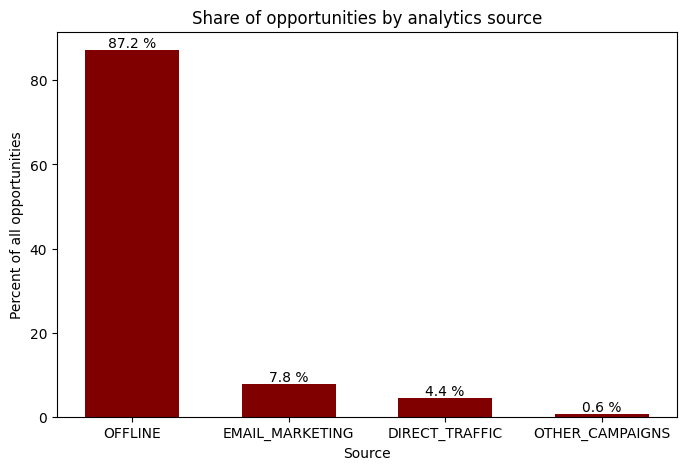

In [6]:
fig = plt.figure(figsize = (8, 5))

percent_of_analytics_source = df["property_hs_analytics_source"].value_counts() / df["property_hs_analytics_source"].count() * 100

plt.bar(df["property_hs_analytics_source"].unique(), percent_of_analytics_source, color ='maroon', width = 0.6)

plt.title('Share of opportunities by analytics source')
plt.xlabel('Source')
plt.ylabel('Percent of all opportunities')

for order, analytics_source in enumerate(percent_of_analytics_source):
    plt.annotate(f'{round(analytics_source, 2)} %',
                        xy=(df["property_hs_analytics_source"].unique()[order], analytics_source),
                        ha='center', va='bottom')

plt.show()

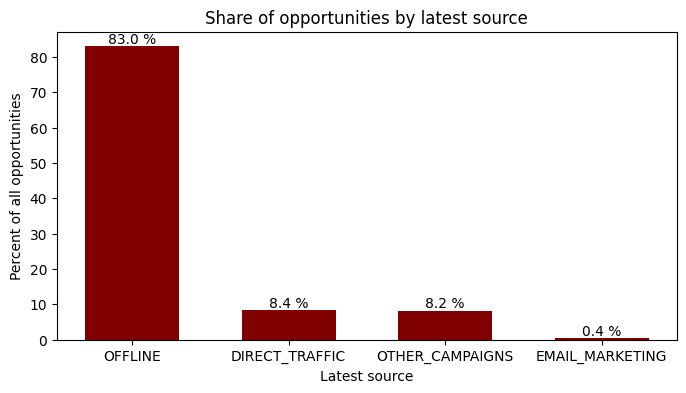

In [7]:
plt.close()

fig = plt.figure(figsize = (8, 4))

percent_of_latest_source = df["property_hs_latest_source"].value_counts() / df["property_hs_latest_source"].count() * 100

plt.bar(df["property_hs_latest_source"].unique(), percent_of_latest_source, color ='maroon', width = 0.6)

plt.title('Share of opportunities by latest source')
plt.xlabel('Latest source')
plt.ylabel('Percent of all opportunities')

for order, latest_source in enumerate(percent_of_latest_source):
    plt.annotate(f'{round(latest_source, 2)} %',
                        xy=(df["property_hs_latest_source"].unique()[order], latest_source),
                        ha='center', va='bottom')

plt.show()

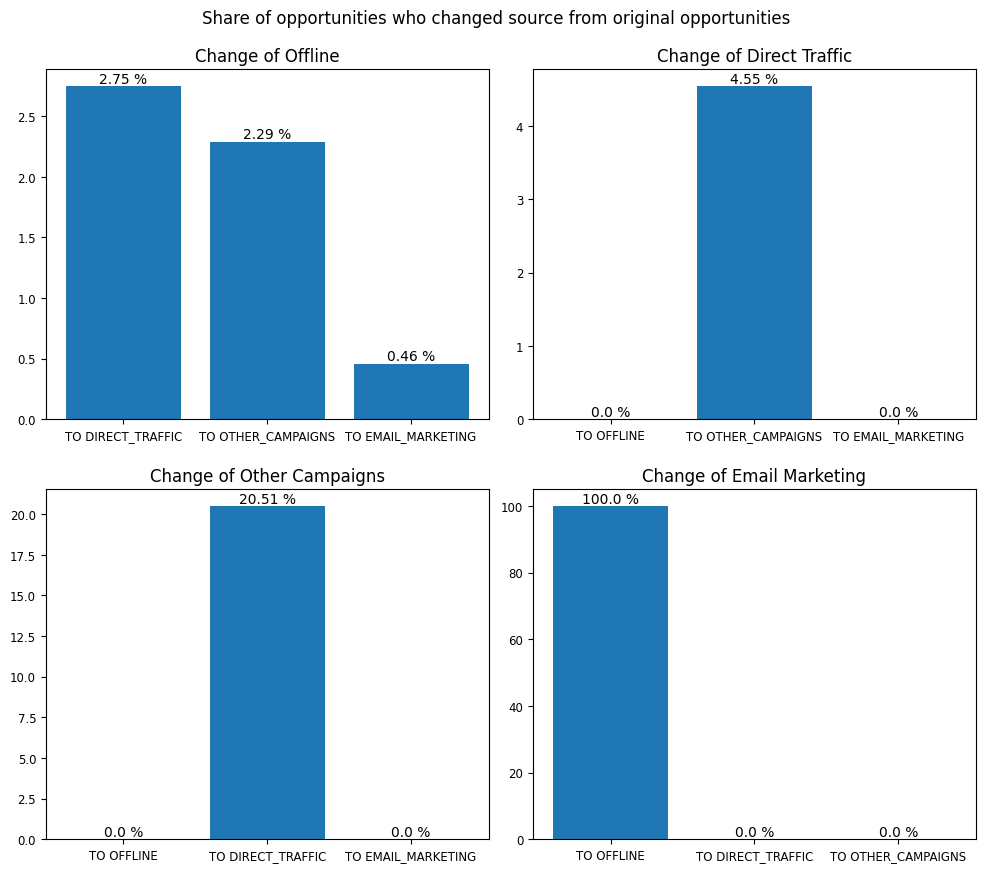

In [8]:
plt.close()

offline_to_direct = round(df.loc[(df["property_hs_analytics_source"] == "OFFLINE") & (df["property_hs_latest_source"] == "DIRECT_TRAFFIC")]["property_hs_analytics_source"].count() / df.loc[df["property_hs_analytics_source"] == "OFFLINE"]["property_hs_analytics_source"].count() * 100, 2)
offline_to_other = round(df.loc[(df["property_hs_analytics_source"] == "OFFLINE") & (df["property_hs_latest_source"] == "OTHER_CAMPAIGNS")]["property_hs_analytics_source"].count() / df.loc[df["property_hs_analytics_source"] == "OFFLINE"]["property_hs_analytics_source"].count() * 100, 2)
offline_to_email = round(df.loc[(df["property_hs_analytics_source"] == "OFFLINE") & (df["property_hs_latest_source"] == "EMAIL_MARKETING")]["property_hs_analytics_source"].count() / df.loc[df["property_hs_analytics_source"] == "OFFLINE"]["property_hs_analytics_source"].count() * 100, 2)
direct_to_offline = round(df.loc[(df["property_hs_analytics_source"] == "DIRECT_TRAFFIC") & (df["property_hs_latest_source"] == "OFFLINE")]["property_hs_analytics_source"].count() / df.loc[df["property_hs_analytics_source"] == "DIRECT_TRAFFIC"]["property_hs_analytics_source"].count() * 100, 2)
direct_to_other = round(df.loc[(df["property_hs_analytics_source"] == "DIRECT_TRAFFIC") & (df["property_hs_latest_source"] == "OTHER_CAMPAIGNS")]["property_hs_analytics_source"].count() / df.loc[df["property_hs_analytics_source"] == "DIRECT_TRAFFIC"]["property_hs_analytics_source"].count() * 100, 2)
direct_to_email = round(df.loc[(df["property_hs_analytics_source"] == "DIRECT_TRAFFIC") & (df["property_hs_latest_source"] == "EMAIL_MARKETING")]["property_hs_analytics_source"].count() / df.loc[df["property_hs_analytics_source"] == "DIRECT_TRAFFIC"]["property_hs_analytics_source"].count() * 100, 2)
other_to_offline = round(df.loc[(df["property_hs_analytics_source"] == "OTHER_CAMPAIGNS") & (df["property_hs_latest_source"] == "OFFLINE")]["property_hs_analytics_source"].count() / df.loc[df["property_hs_analytics_source"] == "OTHER_CAMPAIGNS"]["property_hs_analytics_source"].count() * 100, 2)
other_to_direct = round(df.loc[(df["property_hs_analytics_source"] == "OTHER_CAMPAIGNS") & (df["property_hs_latest_source"] == "DIRECT_TRAFFIC")]["property_hs_analytics_source"].count() / df.loc[df["property_hs_analytics_source"] == "OTHER_CAMPAIGNS"]["property_hs_analytics_source"].count() * 100, 2)
other_to_email = round(df.loc[(df["property_hs_analytics_source"] == "OTHER_CAMPAIGNS") & (df["property_hs_latest_source"] == "EMAIL_MARKETING")]["property_hs_analytics_source"].count() / df.loc[df["property_hs_analytics_source"] == "OTHER_CAMPAIGNS"]["property_hs_analytics_source"].count() * 100, 2)
email_to_offline = round(df.loc[(df["property_hs_analytics_source"] == "EMAIL_MARKETING") & (df["property_hs_latest_source"] == "OFFLINE")]["property_hs_analytics_source"].count() / df.loc[df["property_hs_analytics_source"] == "EMAIL_MARKETING"]["property_hs_analytics_source"].count() * 100, 2)
email_to_direct = round(df.loc[(df["property_hs_analytics_source"] == "EMAIL_MARKETING") & (df["property_hs_latest_source"] == "DIRECT_TRAFFIC")]["property_hs_analytics_source"].count() / df.loc[df["property_hs_analytics_source"] == "EMAIL_MARKETING"]["property_hs_analytics_source"].count() * 100, 2)
email_to_other = round(df.loc[(df["property_hs_analytics_source"] == "EMAIL_MARKETING") & (df["property_hs_latest_source"] == "OTHER_CAMPAIGNS")]["property_hs_analytics_source"].count() / df.loc[df["property_hs_analytics_source"] == "EMAIL_MARKETING"]["property_hs_analytics_source"].count() * 100, 2)

offline_source_change = ["TO DIRECT_TRAFFIC", "TO OTHER_CAMPAIGNS", "TO EMAIL_MARKETING"]
direct_source_change = ["TO OFFLINE", "TO OTHER_CAMPAIGNS", "TO EMAIL_MARKETING"]
other_source_change = ["TO OFFLINE", "TO DIRECT_TRAFFIC", "TO EMAIL_MARKETING"]
email_source_change = ["TO OFFLINE", "TO DIRECT_TRAFFIC", "TO OTHER_CAMPAIGNS"]

source_names = [offline_source_change, direct_source_change, other_source_change, email_source_change]

shares_of_offline_change = [offline_to_direct, offline_to_other, offline_to_email]
shares_of_direct_change = [direct_to_offline, direct_to_other, direct_to_email]
shares_of_other_change = [other_to_offline, other_to_direct, other_to_email]
shares_of_email_change = [email_to_offline, email_to_direct, email_to_other]

change_shares = [shares_of_offline_change, shares_of_direct_change, shares_of_other_change, shares_of_email_change]
subplot_titles = ['Change of Offline', 'Change of Direct Traffic', 'Change of Other Campaigns', 'Change of Email Marketing']

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
f.suptitle('Share of opportunities who changed source from original opportunities', x=0.5, y=0.94)

for number, ax in enumerate([ax1, ax2, ax3, ax4]):
    ax.bar(source_names[number], change_shares[number])
    ax.title.set_text(subplot_titles[number])
    ax.tick_params(axis='both', which='major', labelsize=8.5)
    for index, share in enumerate(change_shares[number]):
        ax.annotate(f'{round(share, 2)} %',
                        xy=(source_names[number][index], share),
                        ha='center', va='bottom')

f.subplots_adjust(hspace=0.2, wspace=0.1)

plt.show()

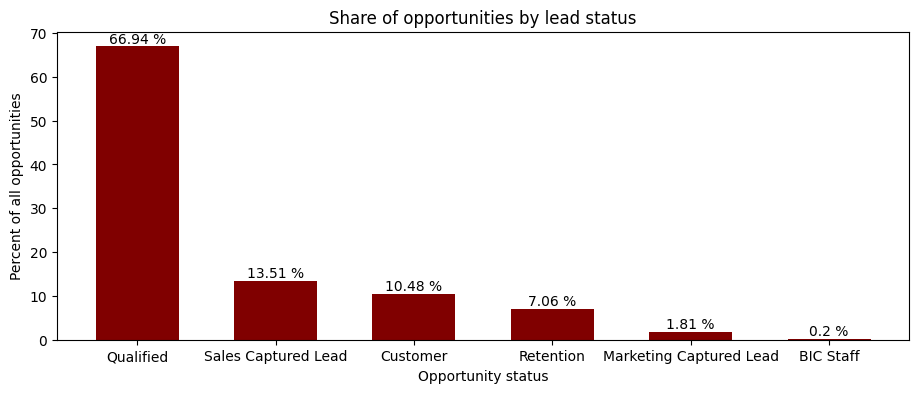

In [9]:
plt.close()

fig = plt.figure(figsize = (11, 4))

lead_statuses = df["property_hs_lead_status"].unique()
lead_statuses = lead_statuses[~pd.isnull(lead_statuses)]

percent_of_lead_statuses = (df["property_hs_lead_status"].value_counts() / df["property_hs_lead_status"].count() * 100)

plt.bar(lead_statuses, percent_of_lead_statuses, color ='maroon', width = 0.6)

plt.title('Share of opportunities by lead status')
plt.xlabel('Opportunity status')
plt.ylabel('Percent of all opportunities')

for order, lead_status_share in enumerate(percent_of_lead_statuses):
    plt.annotate(f'{round(lead_status_share, 2)} %',
                        xy=(lead_statuses[order], lead_status_share),
                        ha='center', va='bottom')

plt.show()

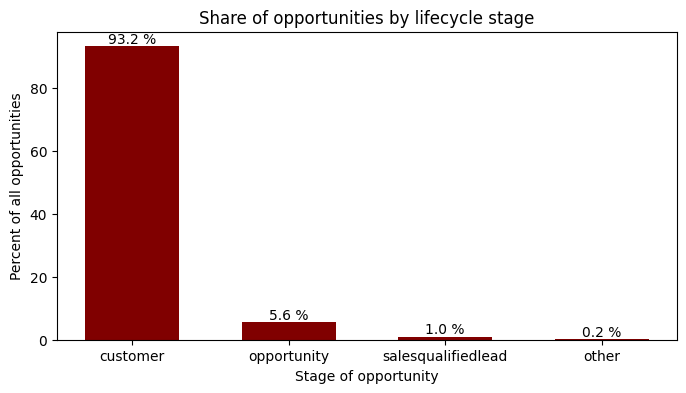

In [10]:
plt.close()

fig = plt.figure(figsize = (8, 4))

percent_of_lifecycle_stages = df["property_lifecyclestage"].value_counts() / df["property_lifecyclestage"].count() * 100

plt.bar(df["property_lifecyclestage"].unique(), percent_of_lifecycle_stages, color ='maroon', width = 0.6)

plt.title('Share of opportunities by lifecycle stage')
plt.xlabel('Stage of opportunity')
plt.ylabel('Percent of all opportunities')

for order, lifecycle_stage in enumerate(percent_of_lifecycle_stages):
    plt.annotate(f'{round(lifecycle_stage, 2)} %',
                        xy=(df["property_lifecyclestage"].unique()[order], lifecycle_stage),
                        ha='center', va='bottom')

plt.show()

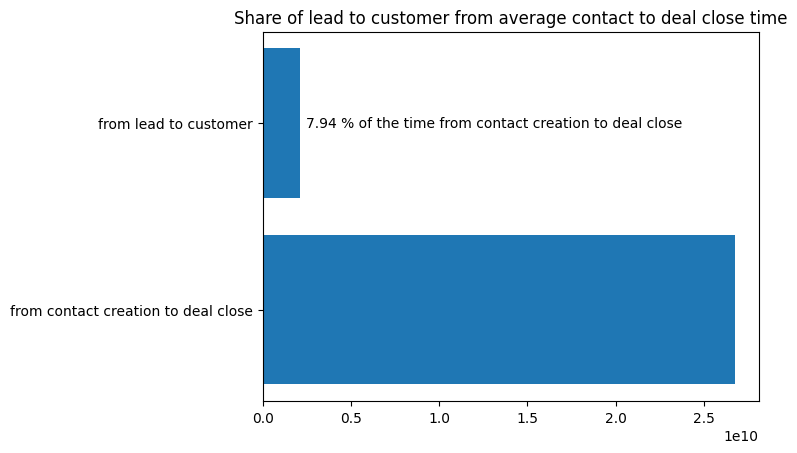

In [11]:
plt.close()

fig, ax = plt.subplots()
ax.barh(["from contact creation to deal close", "from lead to customer"], [df["property_hs_time_between_contact_creation_and_deal_close"].mean(), df["property_hs_time_to_move_from_lead_to_customer"].mean()])
ax.annotate(f'{round(df["property_hs_time_to_move_from_lead_to_customer"].mean() / df["property_hs_time_between_contact_creation_and_deal_close"].mean() * 100, 2)} % of the time from contact creation to deal close',
                        xy=(df["property_hs_time_to_move_from_lead_to_customer"].mean(), "from lead to customer"),
                        xytext=(140, -5),
                        textcoords='offset points',
                        ha='center', va='bottom')
plt.title("Share of lead to customer from average contact to deal close time")

plt.show()